ĺ


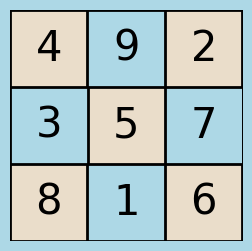

In [21]:
from itertools import combinations
from Logica import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from types import MethodType
from Rejilla import *
from Logica import dpll, tseitin

r = Rejilla(X=3, Y=3)
print(r.CM.ravel([4, 0, 2]))

numero_8 = r.CM.ravel([7, 0, 0])
numero_3 = r.CM.ravel([2, 0, 1])
numero_4 = r.CM.ravel([3, 0, 2])
numero_1 = r.CM.ravel([0, 1, 0])
numero_5 = r.CM.ravel([4, 1, 1])
numero_9 = r.CM.ravel([8, 1, 2])
numero_6 = r.CM.ravel([5, 2, 0])
numero_7 = r.CM.ravel([6, 2, 1])
numero_2 = r.CM.ravel([1, 2, 2])
I = {
    numero_8 : True,
    numero_3 : True,
    numero_4 : True,
    numero_1 : True,
    numero_5 : True,
    numero_9 : True,
    numero_6 : True,
    numero_7 : True,
    numero_2 : True
}
r.visualizar(I)


#0, 2   1, 2   2, 2
#0, 1   1, 1   2, 1
#0, 0   1, 0   2, 0

In [22]:
import pycosat

def SATsolver(A):

    # 1. Tseitin produce CNF con literales como strings
    S = tseitin(A)

    # 2. Extraer todos los literales puros
    lits = sorted({l.replace('-', '') for C in S for l in C})
    mapa = {var: i+1 for i, var in enumerate(lits)}   # var → número

    def lit_num(l):
        if l.startswith('-'):
            return -mapa[l[1:]]
        else:
            return mapa[l]

    # 3. Convertir cláusulas a números
    S_num = [[lit_num(l) for l in C] for C in S]

    # 4. Resolver
    sol = pycosat.solve(S_num)

    if sol == "UNSAT":
        return False, {}

    # 5. Convertir de vuelta
    interpretacion = {var: (mapa[var] in sol) for var in mapa}

    return True, interpretacion


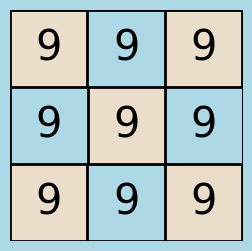

In [23]:
A = r.regla1()
S, I = SATsolver(A)
r.visualizar(I)

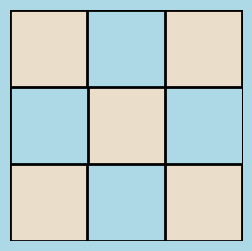

In [24]:
A = r.regla2()
S, I = SATsolver(A)
r.visualizar(I)

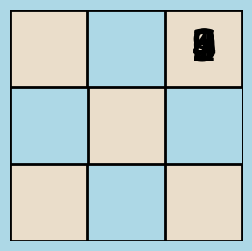

In [25]:
A = r.regla3()
S, I = SATsolver(A)
r.visualizar(I)

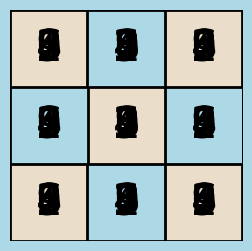

In [26]:
A = r.regla4()
S, I = SATsolver(A)
r.visualizar(I)

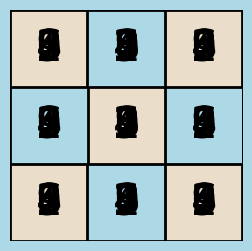

In [27]:
A = r.regla5()
S, I = SATsolver(A)
r.visualizar(I)

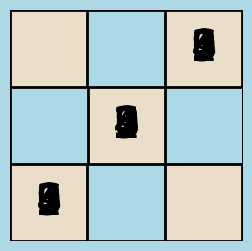

In [28]:
A = r.regla6_1()
S, I = SATsolver(A)
r.visualizar(I)

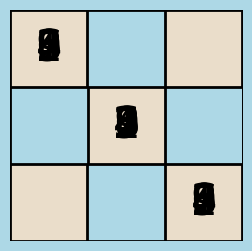

In [29]:
A = r.regla6_2()
S, I = SATsolver(A)
r.visualizar(I)

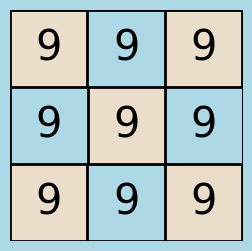

In [30]:
r1 = r.regla1()
r2 = r.regla2()

A = '(' + str(r1) + 'Y' + str(r2) + ')'
S, I = SATsolver(A)
r.visualizar(I)

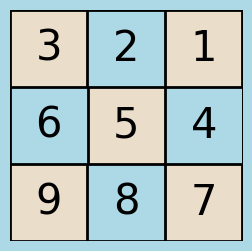

In [31]:
r1 = r.regla1()
r2 = r.regla2()
r3 = r.regla3()


A = '(' + '(' + str(r1) + 'Y' + str(r2) + ')' + 'Y' + str(r3) +')'
S, I = SATsolver(A)
r.visualizar(I)


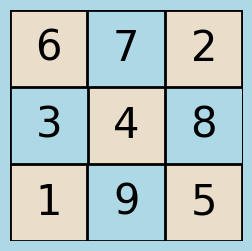

In [32]:
r1 = r.regla1()
r2 = r.regla2()
r3 = r.regla3()
r4 = r.regla4()



A = '(' + '(' + str(r1) + 'Y' + str(r2) + ')'+ 'Y'+ '(' + str(r3) + 'Y' + str(r4) +')' + ')'
S, I = SATsolver(A)
r.visualizar(I)

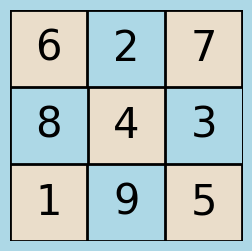

In [33]:
r1 = r.regla1()
r2 = r.regla2()
r3 = r.regla3()
r4 = r.regla4()
r5 = r.regla5()




A = '(' + '(' + '(' + str(r1) + 'Y' + str(r2) + ')' + 'Y' + '(' + str(r3) + 'Y' + str(r4) + ')' + ')' + 'Y' + str(r5) +')'
S, I = SATsolver(A)
r.visualizar(I)

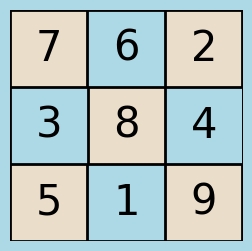

In [34]:

r1 = r.regla1()
r2 = r.regla2()
r3 = r.regla3()
r4 = r.regla4()
r5 = r.regla5()
r6 = r.regla6_1()




A = '(' + '(' + '(' + str(r1) + 'Y' + str(r2) + ')' + 'Y' + '(' + str(r3) + 'Y' + str(r4) + ')' + ')' + 'Y' + '(' + str(r5) + 'Y' + str(r6) +')' + ')'
S, I = SATsolver(A)
r.visualizar(I)

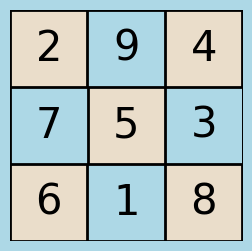

In [35]:
r1 = r.regla1()
r2 = r.regla2()
r3 = r.regla3()
r4 = r.regla4()
r5 = r.regla5()
r6 = r.regla6_1()
r7 = r.regla6_2()




A = '(' + '(' + '(' + '(' + str(r1) + 'Y' + str(r2) + ')' + 'Y' + '(' + str(r3) + 'Y' + str(r4) + ')' + ')' + 'Y' + '(' + str(r5) + 'Y' + str(r6) +')' + ')' + 'Y' + str(r7) +')'
S, I = SATsolver(A)
r.visualizar(I)